# User Profiling and Segmentation
User profiling refers to creating detailed profiles that represent the behaviours and preferences of users, and segmentation divides the user base into distinct groups with common characteristics, making it easier to target specific segments with personalized marketing, products, or services

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/user-profiles/user_profiles_for_ads.csv


In [2]:
user_profile_data = pd.read_csv('/kaggle/input/user-profiles/user_profiles_for_ads.csv')

In [3]:
print(user_profile_data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

# Dataset column description


User ID: Unique identifier for each user.

Age: Age range of the user.

Gender: Gender of the user.

Location: User’s location type (Urban, Suburban, Rural).

Language: Primary language of the user.

Education Level: Highest education level achieved.

Likes and Reactions: Number of likes and reactions a user has made.

Followed Accounts: Number of accounts a user follows.

Device Usage: Primary device used for accessing the platform (Mobile, Desktop, Tablet).

Time Spent Online (hrs/weekday): Average hours spent online on weekdays.

Time Spent Online (hrs/weekend): Average hours spent online on weekends.

Click-Through Rates (CTR): The percentage of ad impressions that lead to clicks.

Conversion Rates: The percentage of clicks that lead to conversions/actions.

Ad Interaction Time (sec): Average time spent interacting with ads in seconds.

Income Level: User’s income level.

Top Interests: Primary interests of the user.

In [4]:
#Checking for null values
user_profile_data.isnull().sum()

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64

The dataset has no missing values, which is great for our analysis. Let’s move further with EDA.

# Exploratory Data Analysis
We’ll begin exploratory data analysis by visualizing the distribution of the 
Demographic variables (age, gender, education level, and income level)

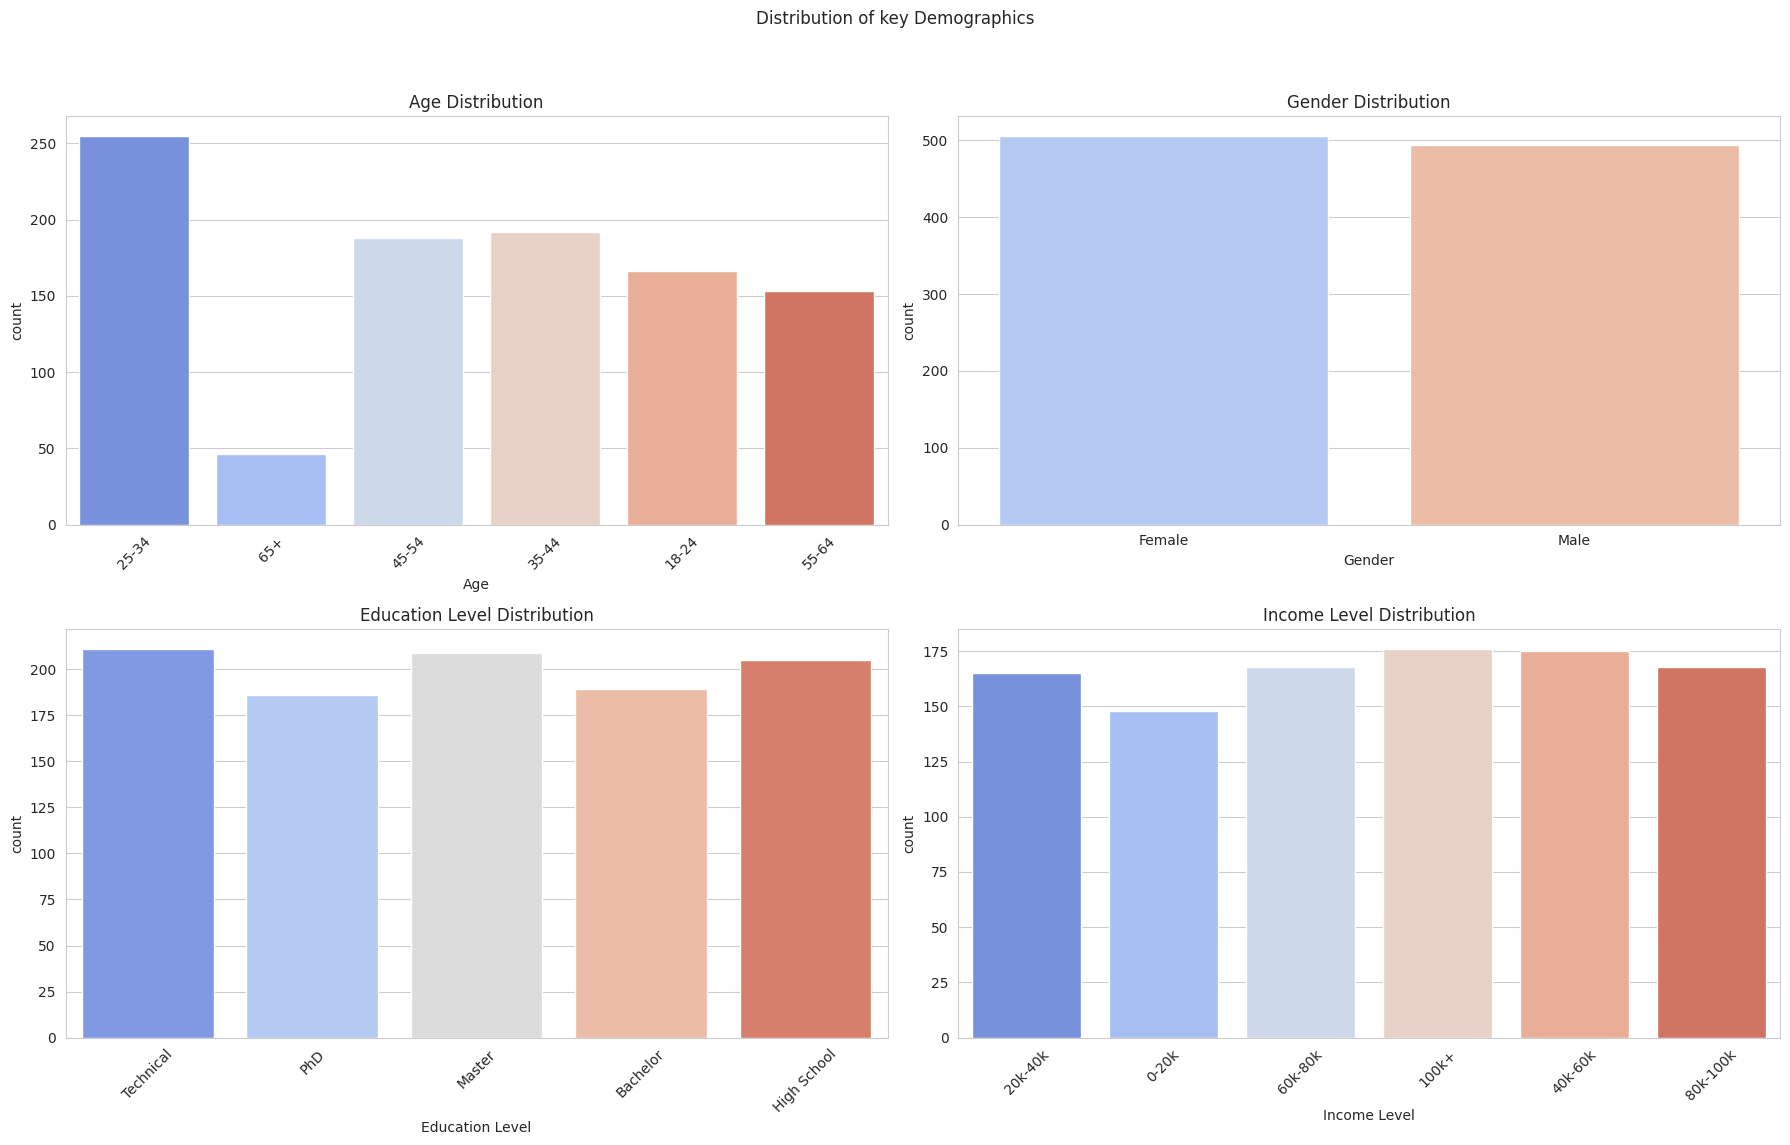

In [5]:
#setting the aesthetic style of the plot
sns.set_style('whitegrid')

#creating subplots for demographic distribution

fig, axes = plt.subplots(2,2, figsize = (18,12))
fig.suptitle('Distribution of key Demographics')

#age distribution
sns.countplot( ax = axes[0,0], x='Age',data= user_profile_data, palette= 'coolwarm')
axes[0,0].set_title('Age Distribution')
axes[0,0].tick_params(axis='x', rotation = 45)

#gender distribution
sns.countplot(ax=axes[0,1], x= 'Gender', data=user_profile_data,palette='coolwarm')
axes[0,1].set_title('Gender Distribution')

# education level distribution
sns.countplot(ax=axes[1,0], x= 'Education Level', data=user_profile_data, palette = 'coolwarm')
axes[1,0].set_title('Education Level Distribution')
axes[1,0].tick_params(axis = 'x', rotation= 45)

#income level distribution
sns.countplot(ax=axes[1,1], x= 'Income Level', data= user_profile_data, palette= 'coolwarm')
axes[1,1].set_title('Income Level Distribution')
axes[1,1].tick_params(axis = 'x',rotation= 45)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

We’ll now examine device usage patterns to understand the primary means by which users access the platform. This information is crucial for optimizing ad formats and delivery channels. Additionally, we’ll explore users’ online behaviour, including their engagement with content and ads, and identify the most common interests among users. Let’s proceed with analyzing device usage patterns:

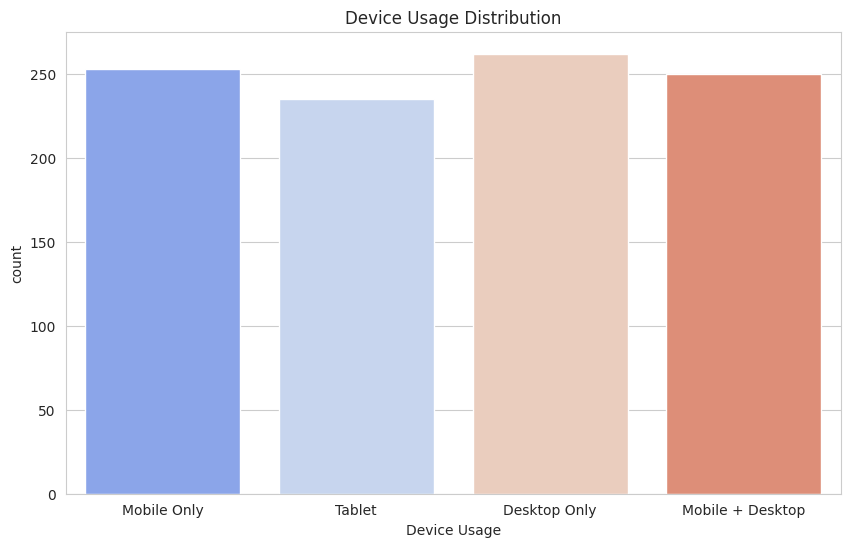

In [6]:
#device usage distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Device Usage',data=user_profile_data,palette='coolwarm' )
plt.title('Device Usage Distribution')
plt.show()

We’ll now:

Analyze the average time users spend online on weekdays versus weekends.
Investigate user engagement metrics, such as likes and reactions.
Delve into ad interaction metrics, including Click-Through Rates (CTR), Conversion Rates, and Ad Interaction Time.
It will help us understand the users’ activity patterns and their interaction with ads, which is crucial for effective ad targeting and optimization:

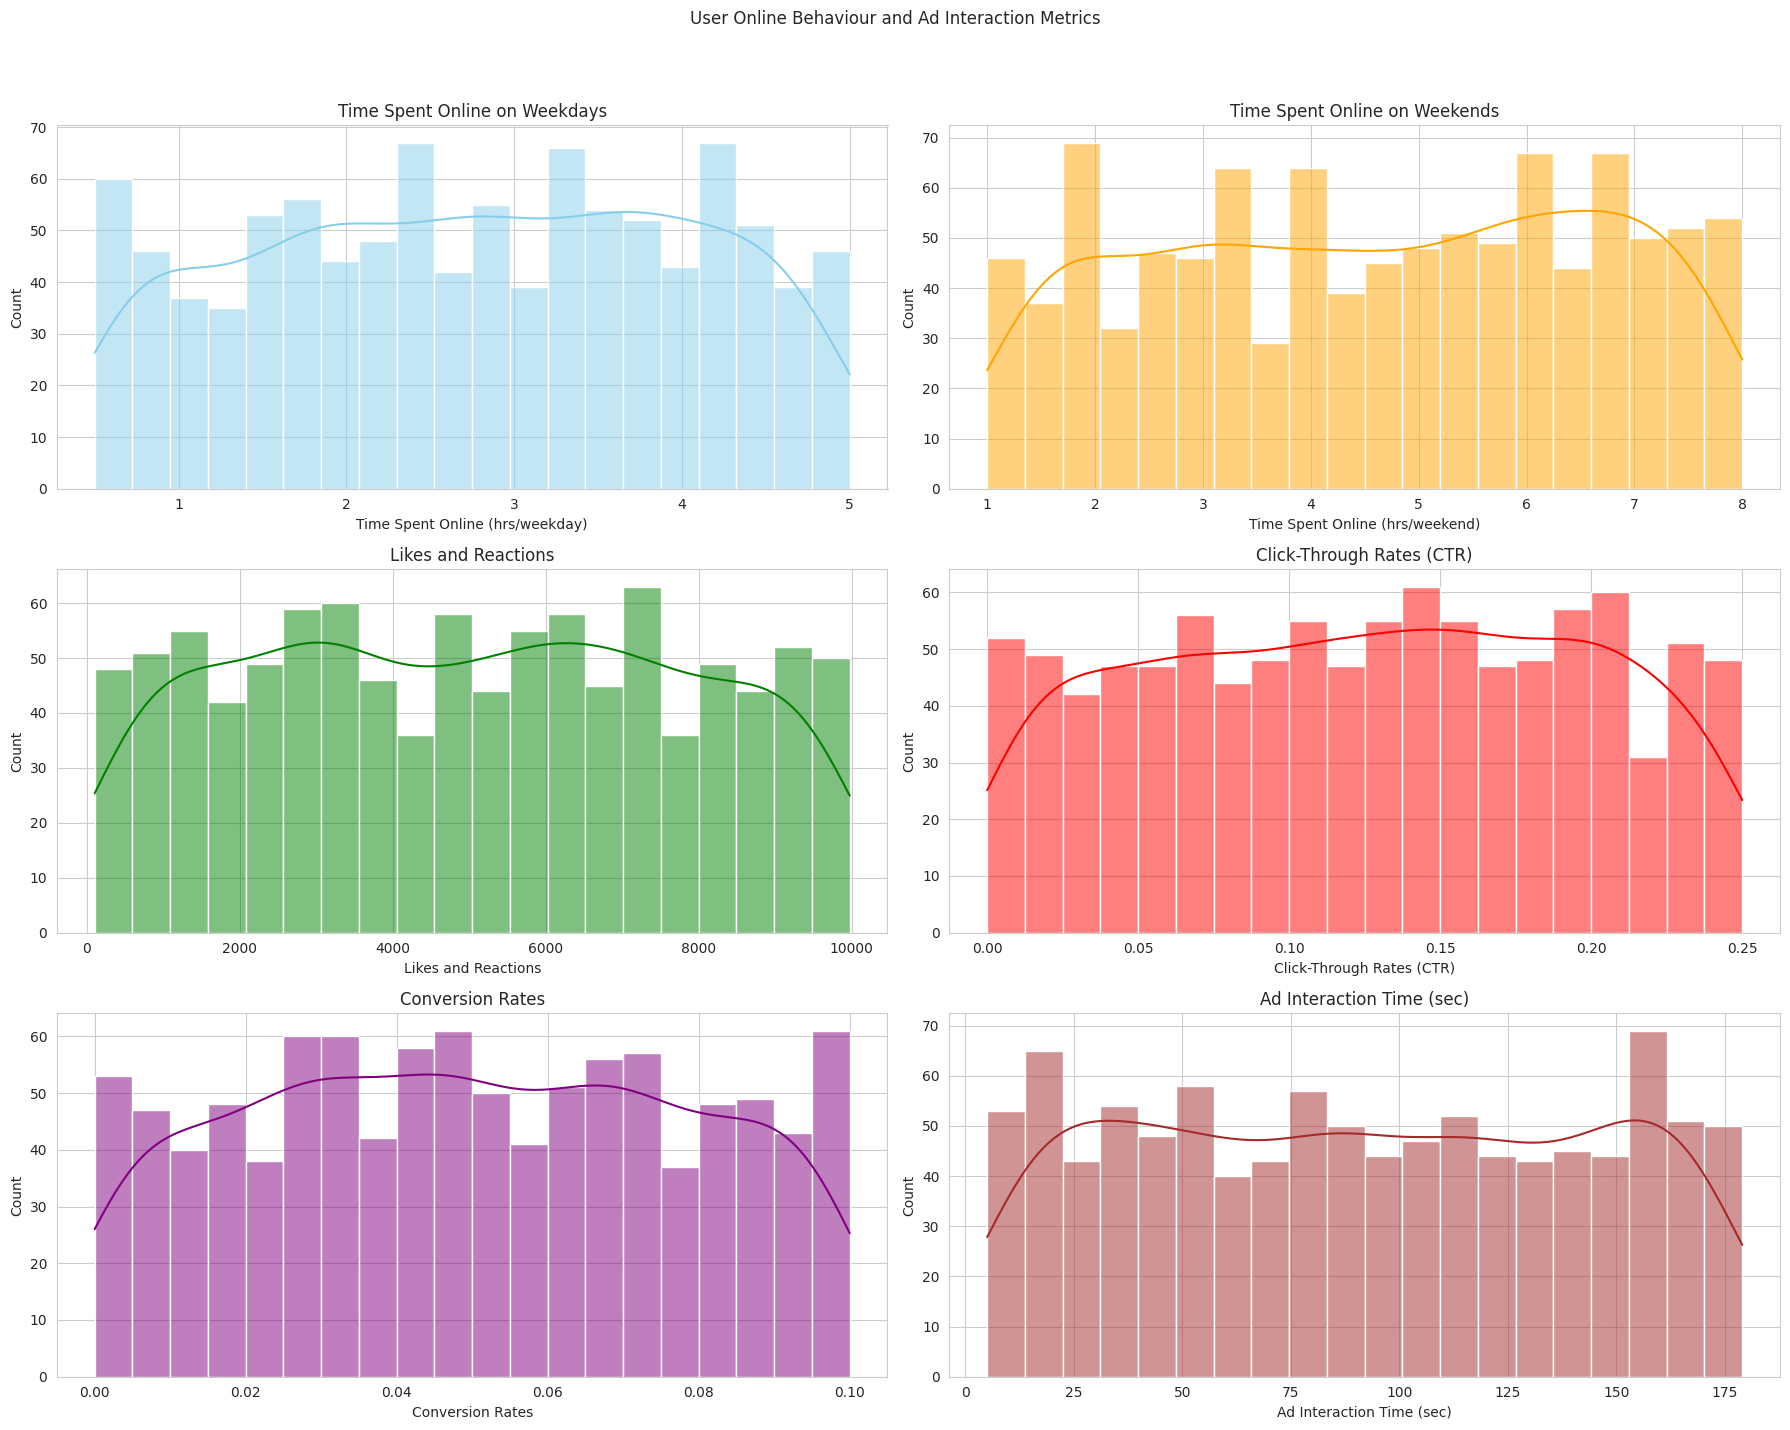

In [7]:
#creating segment for user online behaviour and ad interaction metrics
fig, axes = plt.subplots(3,2, figsize=(18,15))
fig.suptitle('User Online Behaviour and Ad Interaction Metrics')
#time spent online on weekdays
sns.histplot(ax= axes[0,0],x='Time Spent Online (hrs/weekday)',data= user_profile_data,bins=20,
             kde=True,color='skyblue')
axes[0,0].set_title('Time Spent Online on Weekdays')

#time spent online on weekends
sns.histplot(ax=axes[0,1], x= 'Time Spent Online (hrs/weekend)',
             data = user_profile_data,bins=20,kde=True,color='orange')
axes[0,1].set_title('Time Spent Online on Weekends')
#likes and reactions
sns.histplot(ax=axes[1,0], x= 'Likes and Reactions',data = user_profile_data, bins=20,
             kde=True, color='green')
axes[1,0].set_title('Likes and Reactions')
sns.histplot(ax=axes[1,1], x='Click-Through Rates (CTR)',data= user_profile_data, bins=20, kde=True,color='red')
axes[1,1].set_title('Click-Through Rates (CTR)')

#conversion rates
sns.histplot(ax=axes[2,0], x='Conversion Rates', data=user_profile_data,bins=20,kde=True,color='purple')
axes[2,0].set_title('Conversion Rates')

#Ad Interaction Time
sns.histplot(ax=axes[2,1], x='Ad Interaction Time (sec)',data=user_profile_data,bins=20,kde=True,color='brown')
axes[2,1].set_title('Ad Interaction Time (sec)')

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show();

Now, let’s identify the most common interests among users, which is vital for segmenting the audience and tailoring ad campaigns to match user preferences:

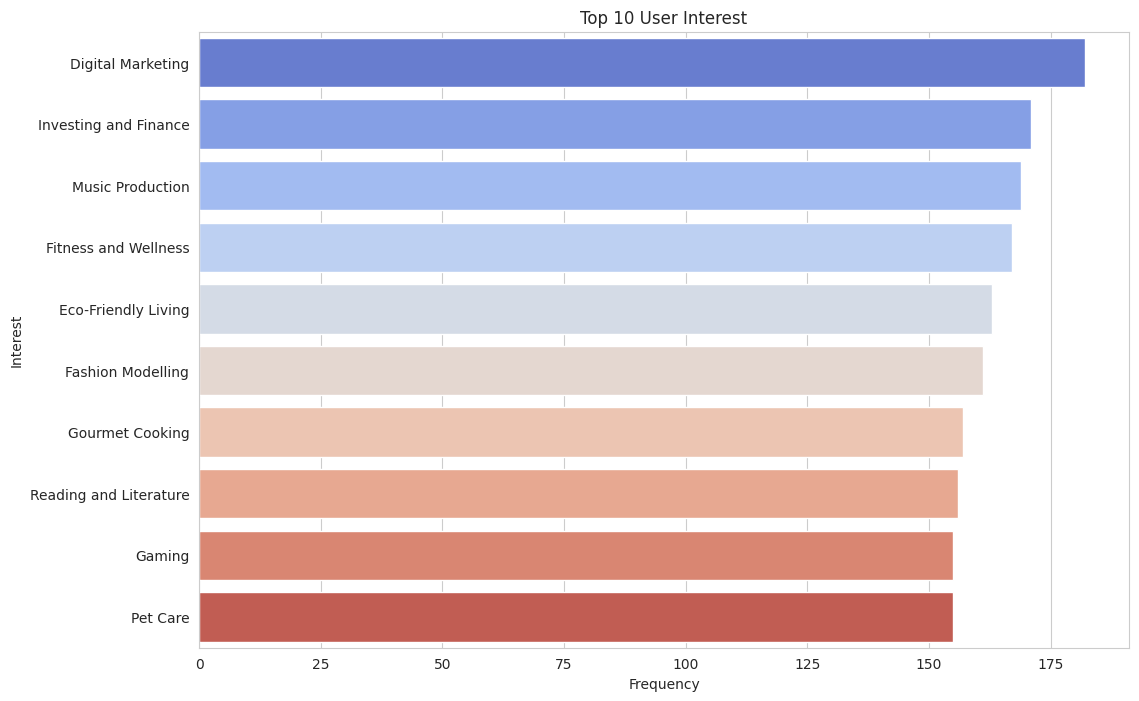

In [8]:
from collections import Counter
#Splitting the 'Top interests' columns and creating a list of all

interest_list = user_profile_data['Top Interests'].str.split(', ').sum()

#counting the frequency of each interest
interest_counter = Counter(interest_list)

#Converting the counter object to a dataframe for easy plotting
interests_df =pd.DataFrame(interest_counter.items(), 
                    columns = ['Interests', 'Frequency']).sort_values(by='Frequency',ascending = False)

#Plotting the most common interests
plt.figure(figsize=(12,8))
sns.barplot(x='Frequency',y='Interests',data=interests_df.head(10),palette = 'coolwarm')
plt.title('Top 10 User Interest')
plt.xlabel('Frequency')
plt.ylabel('Interest')
plt.show()

# User Profiling and Segmentation

We can now segment users into different groups for targeted ad campaigns. 
Segmentation can be based on various criteria, such as:
Demographics: Age, Gender, Income Level, Education Level
Behavioural: Time Spent Online, Likes and Reactions, Click-through rate (CTR), Conversion Rates
Interests: Aligning ad content with the top interests identified
To implement user profiling and segmentation, we can apply clustering techniques or develop personas based on the combination of these attributes. This approach enables the creation of more personalized and effective ad campaigns, ultimately enhancing user engagement and conversion rates.

Let’s start by selecting a subset of features that could be most indicative of user preferences and behaviour for segmentation and apply a clustering algorithm to create user segments:

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [10]:
features = ['Age', 'Gender', 'Income Level', 'Time Spent Online (hrs/weekday)', 
            'Time Spent Online (hrs/weekend)', 'Likes and Reactions', 'Click-Through Rates (CTR)']

# Separating the features we want to consider for clustering
X = user_profile_data[features]

In [11]:
#definning preprocessing for numerical and categorical features
numeric_features = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 
                    'Likes and Reactions', 'Click-Through Rates (CTR)']
numeric_transformer = StandardScaler()

In [12]:
categorical_features = ['Age', 'Gender', 'Income Level']
categorical_transformer = OneHotEncoder()

In [13]:
#Combinning preprocessing steps
preprocessor = ColumnTransformer(
    transformers = [('num',numeric_transformer,numeric_features),
                    ('cat',categorical_transformer,categorical_features)])

# Creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                          ('cluster',KMeans(n_clusters=5,random_state=42))])

In [14]:
pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
user_profile_data['Cluster'] = cluster_labels
print(user_profile_data.head())

   User ID    Age  Gender  Location Language Education Level  \
0        1  25-34  Female  Suburban    Hindi       Technical   
1        2    65+    Male     Urban    Hindi             PhD   
2        3  45-54  Female  Suburban  Spanish       Technical   
3        4  35-44  Female     Rural  Spanish             PhD   
4        5  25-34  Female     Urban  English       Technical   

   Likes and Reactions  Followed Accounts  Device Usage  \
0                 5640                190   Mobile Only   
1                 9501                375        Tablet   
2                 4775                187   Mobile Only   
3                 9182                152  Desktop Only   
4                 6848                371   Mobile Only   

   Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
0                              4.5                              1.7   
1                              0.5                              7.7   
2                              4.5             

The clustering process has successfully segmented our users into five distinct groups (Clusters 0 to 4). Each cluster represents a unique combination of the features we selected, including age, gender, income level, online behaviour, and engagement metrics. These clusters can serve as the basis for creating targeted ad campaigns tailored to the preferences and behaviours of each segment.

We’ll compute the mean values of the numerical features and the mode for categorical features within each cluster to get a sense of their defining characteristics:

In [15]:
#computing the mean value 
cluster_means = user_profile_data.groupby('Cluster')[numeric_features].mean()

In [16]:
for feature in categorical_features:
    mode_series = user_profile_data.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series
print(cluster_means)

         Time Spent Online (hrs/weekday)  Time Spent Online (hrs/weekend)  \
Cluster                                                                     
0                               1.632955                         6.135795   
1                               2.937500                         2.735000   
2                               3.364532                         6.151724   
3                               3.872986                         4.624171   
4                               1.558235                         3.769412   

         Likes and Reactions  Click-Through Rates (CTR)    Age  Gender  \
Cluster                                                                  
0                5480.022727                   0.173705  25-34    Male   
1                7462.233333                   0.152983  25-34    Male   
2                5997.108374                   0.058502  25-34    Male   
3                2409.625592                   0.167123  25-34  Female   
4               

Now, we’ll assign each cluster a name that reflects its most defining characteristics based on the mean values of numerical features and the most frequent categories for categorical features. Based on the cluster analysis, we can summarize and name the segments as follows:

Cluster 0 – “Weekend Warriors”: High weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 80k-100k.
Cluster 1 – “Engaged Professionals”: Balanced online activity, high likes and reactions, predominantly male, age group 25-34, high income (100k+).
Cluster 2 – “Low-Key Users”: Moderate to high weekend online activity, moderate likes and reactions, predominantly male, age group 25-34, income level 60k-80k, lower CTR.
Cluster 3 – “Active Explorers”: High overall online activity, lower likes and reactions, predominantly female, age group 25-34, income level 60k-80k.
Cluster 4 – “Budget Browsers”: Moderate online activity, lowest likes and reactions, predominantly female, age group 25-34, lowest income level (0-20k), lower CTR.

In [17]:
#preparing data fro radar chart
features_to_plot = ['Time Spent Online (hrs/weekday)',
                    'Time Spent Online (hrs/weekend)','Likes and Reactions','Click-Through Rates (CTR)']
labels = np.array(features_to_plot)

In [20]:
# creating a dataframe for the radar chart
radar_df = cluster_means[features_to_plot].reset_index()

#normalizing the data
radar_df_normalized = radar_df.copy()

In [23]:
for feature in features_to_plot:
    radar_df_normalized[feature] = (radar_df[feature] - radar_df[feature].min())/ (radar_df[feature].max() - radar_df[feature].min())
#adding a full circle for plotting
radar_df_normalized = pd.concat([radar_df_normalized, radar_df_normalized.iloc[[0]]], ignore_index=True)
#assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

Now, let’s create a visualization that reflects these segments, using the cluster means for numerical features and highlighting the distinctive characteristics of each segment. We’ll create a radar chart that compares the mean values of selected features across the clusters, providing a visual representation of each segment’s profile:

In [24]:
import plotly.graph_objects as go
fig = go.Figure

In [36]:
import plotly.graph_objects as go

fig = go.Figure()  # This guarantees it's the right object

# loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(
        go.Scatterpolar(
            r=radar_df_normalized.iloc[i][features_to_plot].values.tolist() + 
              [radar_df_normalized.iloc[i][features_to_plot].values[0]],  # Close loop
            theta=labels.tolist() + [labels[0]],  # Close loop
            fill='toself',
            name=segment,
            hoverinfo='text',
            text=[f"{label}: {value:.2f}" for label, value in zip(features_to_plot, radar_df_normalized.iloc[i][features_to_plot])] + 
                 [f"{labels[0]}: {radar_df_normalized.iloc[i][features_to_plot][0]:.2f}"]
        )
    )


In [38]:
# update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='User Segments Profile'
)

fig.show()

The chart above is useful for marketers to understand the behaviour of different user segments and tailor their advertising strategies accordingly. For example, ads targeting the “Weekend Warriors” could be scheduled for the weekend when they are most active, while “Engaged Professionals” might respond better to ads that are spread evenly throughout the week.

# Summary

So, this is how you can perform User Profiling and Segmentation using Python.
User profiling refers to creating detailed profiles that represent the behaviours and preferences of users, and segmentation divides the user base into distinct groups with common characteristics, making it easier to target specific segments with personalized marketing, products, or services.